# LeNet5 Architecture

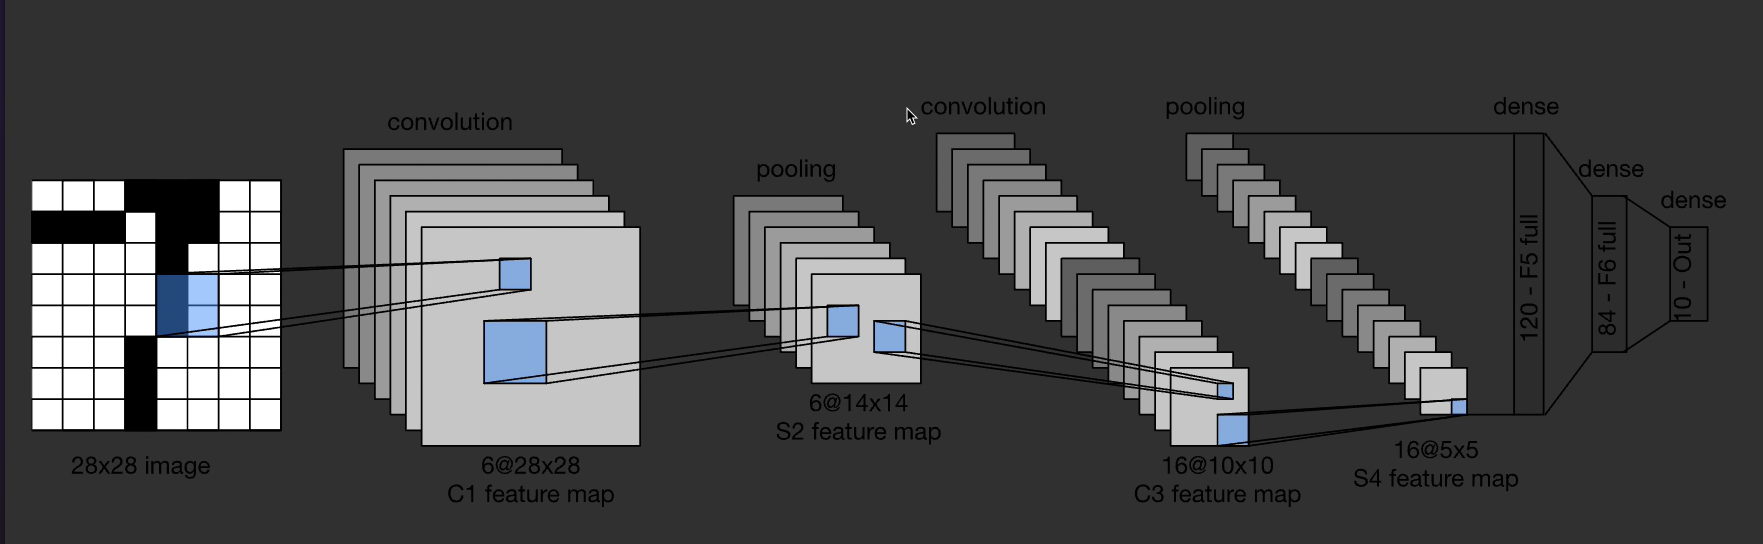

In [2]:
from tensorflow import keras 
from keras.datasets import mnist 
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

# Loading the dataset and perform splitting

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# Performing the reshaping operation
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)


In [6]:
x_train.shape[0]

60000

In [7]:
x_test.shape[0]

10000

# Normalization

In [8]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# One hot Encoding the Labels

In [ ]:
y_train = keras.utils.to_categorical(y_train,10) # To categorical means converting the labels into one hot encoding and parameters are the number of classes
y_test = keras.utils.to_categorical(y_test,10)

In [10]:
y_test[10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Network Structure

In [19]:
model = Sequential()

model.add(Conv2D(6, kernel_size=(5,5), activation='relu', input_shape=(28,28,1))) # 24 X 24 X 6
model.add(MaxPooling2D(pool_size=(2,2))) # 12 X 12 X 6
model.add(Conv2D(16, kernel_size=(5,5), activation='relu')) # 8 X 8 X 16
model.add(MaxPooling2D(pool_size=(2,2))) # 4 X 4 X 16
model.add(Conv2D(120, kernel_size=(5,5), activation='relu',padding='same')) # 4 X 4 X 120
model.add(Flatten())
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 1920)             

# Model Compilation

In [21]:
model.compile(loss=keras.metrics.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10


469/469 [==============================] - 5s 8ms/step - loss: 0.2532 - accuracy: 0.9201 - val_loss: 0.0682 - val_accuracy: 0.9790
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0647 - accuracy: 0.9803 - val_loss: 0.0440 - val_accuracy: 0.9853
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0448 - accuracy: 0.9861 - val_loss: 0.0386 - val_accuracy: 0.9874
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0344 - accuracy: 0.9890 - val_loss: 0.0372 - val_accuracy: 0.9881
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0273 - accuracy: 0.9913 - val_loss: 0.0321 - val_accuracy: 0.9902
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0246 - accuracy: 0.9918 - val_loss: 0.0359 - val_accuracy: 0.9874
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0196 - accuracy: 0.9936 - val_loss: 0.0345 - val_accuracy: 0.9890
Epoc

In [22]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0422 - accuracy: 0.9877
Test loss: 0.042248524725437164
Test accuracy: 0.9876999855041504


In [24]:
model.save('lenet5_model.h5')

c:\Users\chara\anaconda3\envs\dlenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 89ms/step


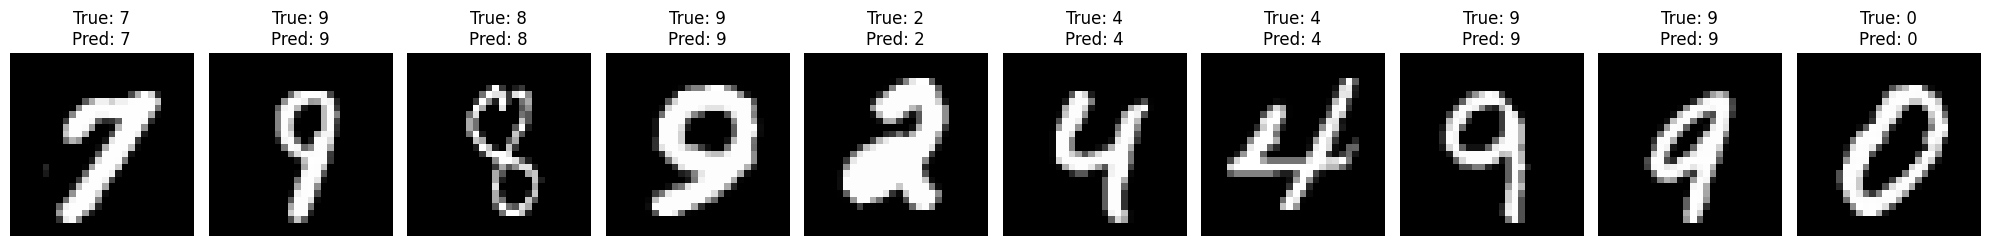


Prediction Summary:
Image 1: True Label = 7, Predicted Label = 7
Image 2: True Label = 9, Predicted Label = 9
Image 3: True Label = 8, Predicted Label = 8
Image 4: True Label = 9, Predicted Label = 9
Image 5: True Label = 2, Predicted Label = 2
Image 6: True Label = 4, Predicted Label = 4
Image 7: True Label = 4, Predicted Label = 4
Image 8: True Label = 9, Predicted Label = 9
Image 9: True Label = 9, Predicted Label = 9
Image 10: True Label = 0, Predicted Label = 0


In [ ]:
def predict_on_mnist_images(model, images, true_labels, num_samples=5):
    """
    Makes predictions on a subset of MNIST images using the given model
    and displays the results.

    Args:
        model (tf.keras.Model): The trained Keras model.
        images (np.array): Preprocessed image data (e.g., x_test).
        true_labels (np.array): True labels corresponding to the images (e.g., y_test).
        num_samples (int): Number of random samples to predict and display.
    """
    if num_samples > len(images):
        num_samples = len(images)
        print(f"Warning: num_samples adjusted to {num_samples} as it exceeds available images.")

    # Select random samples
    indices = np.random.choice(len(images), num_samples, replace=False)
    sample_images = images[indices]
    sample_true_labels = true_labels[indices]

    # Make predictions
    predictions = model.predict(sample_images)
    predicted_classes = np.argmax(predictions, axis=1)

    # Display results
    plt.figure(figsize=(20, 20))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {sample_true_labels[i]}\nPred: {predicted_classes[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    print("\nPrediction Summary:")  
    for i in range(num_samples):
        print(f"Image {i+1}: True Label = {sample_true_labels[i]}, Predicted Label = {predicted_classes[i]}")

# Example usage: Predict on 5 random images from the test set
predict_on_mnist_images(model, x_test, y_test, num_samples=10)
